In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28)) / 255.0
test_images = test_images.reshape((10000, 28, 28)) / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the RNN model
model = models.Sequential()
model.add(layers.SimpleRNN(128, input_shape=(28, 28)))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3913 - accuracy: 0.8823 - val_loss: 0.2255 - val_accuracy: 0.9320
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1865 - accuracy: 0.9448 - val_loss: 0.1466 - val_accuracy: 0.9576
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.1498 - accuracy: 0.9563 - val_loss: 0.1217 - val_accuracy: 0.9645
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.1365 - accuracy: 0.9600 - val_loss: 0.1147 - val_accuracy: 0.9646
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1393 - accuracy: 0.9598
Test accuracy: 0.9598000049591064


313/313 [==============================] - 0s 2ms/step


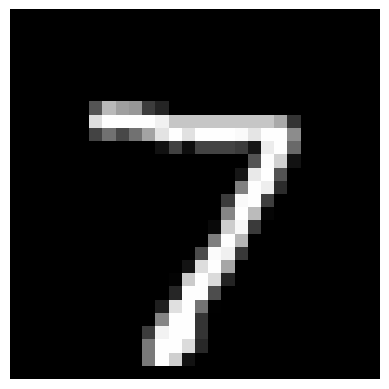

Actual Label: 7, Predicted Label: 7



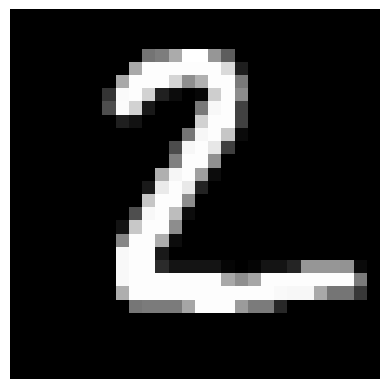

Actual Label: 2, Predicted Label: 2



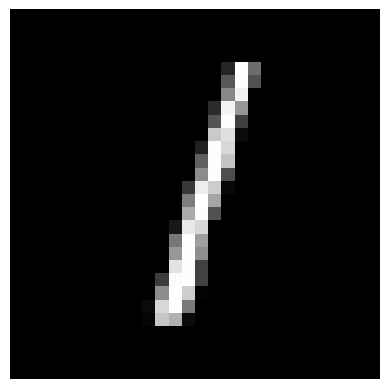

Actual Label: 1, Predicted Label: 1



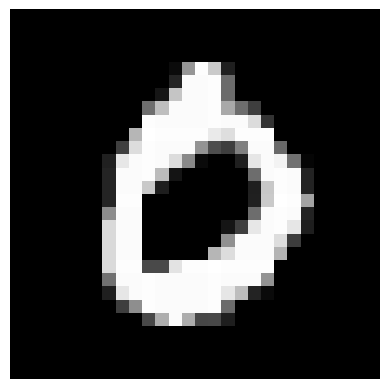

Actual Label: 0, Predicted Label: 0



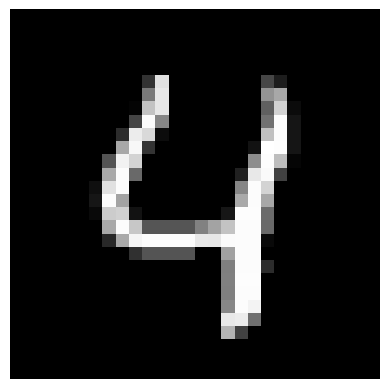

Actual Label: 4, Predicted Label: 4



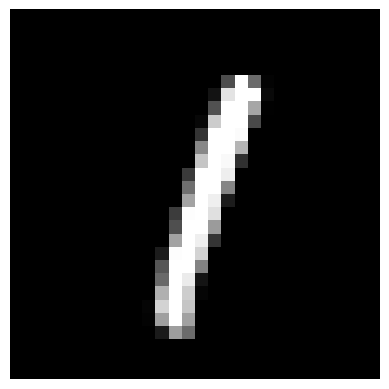

Actual Label: 1, Predicted Label: 1



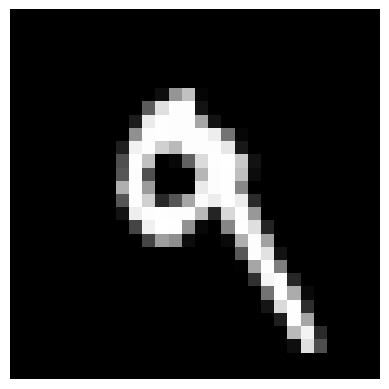

Actual Label: 9, Predicted Label: 9



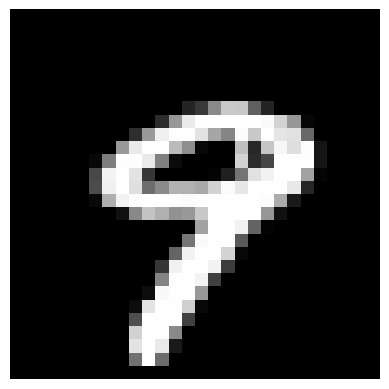

Actual Label: 9, Predicted Label: 9



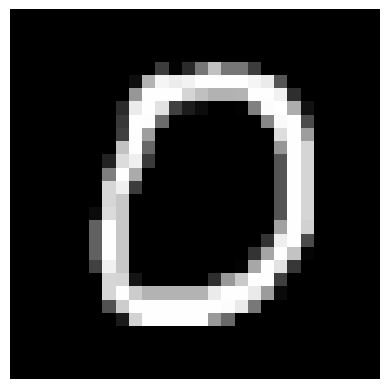

Actual Label: 0, Predicted Label: 0



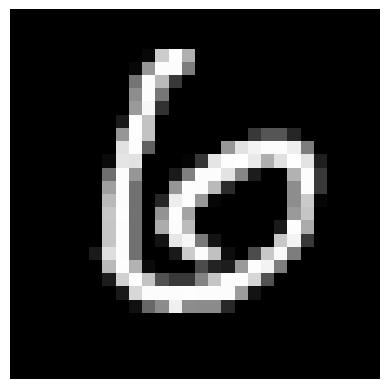

Actual Label: 6, Predicted Label: 6



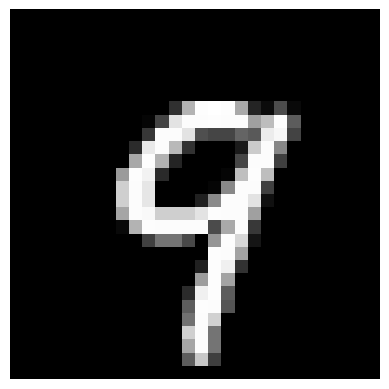

Actual Label: 9, Predicted Label: 9



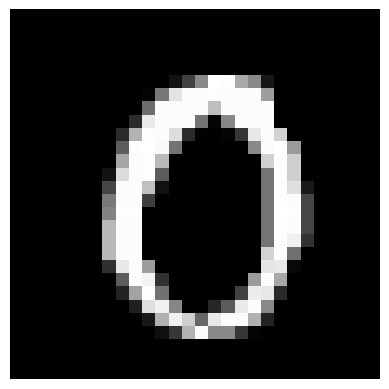

Actual Label: 0, Predicted Label: 0



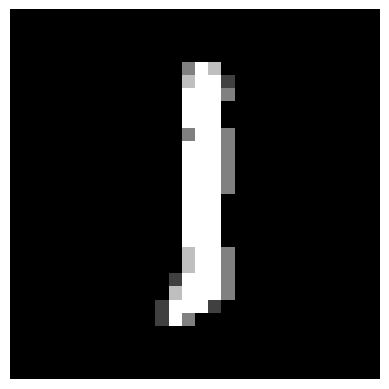

Actual Label: 1, Predicted Label: 1



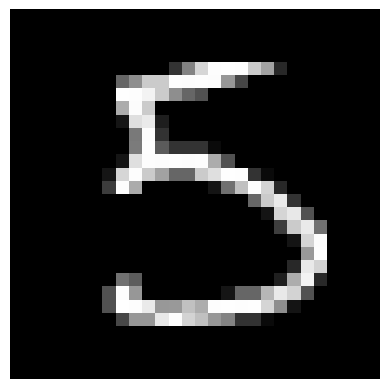

Actual Label: 5, Predicted Label: 5



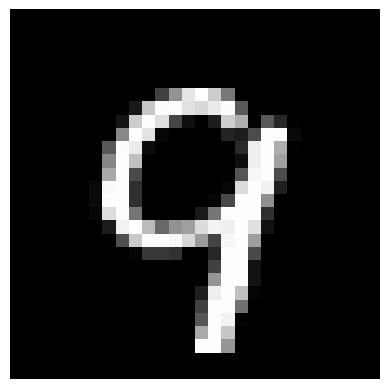

Actual Label: 9, Predicted Label: 9



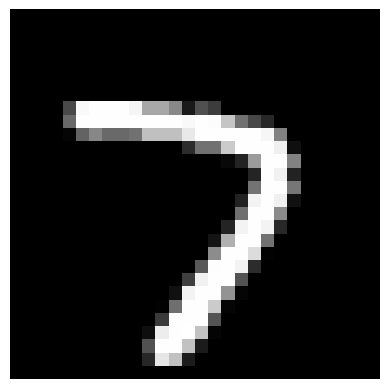

Actual Label: 7, Predicted Label: 7



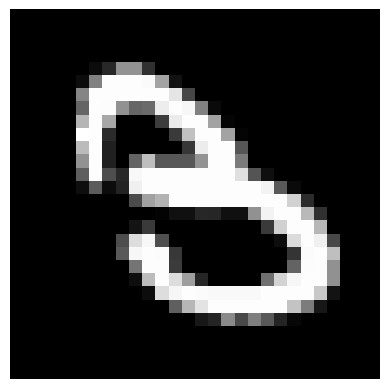

Actual Label: 3, Predicted Label: 3



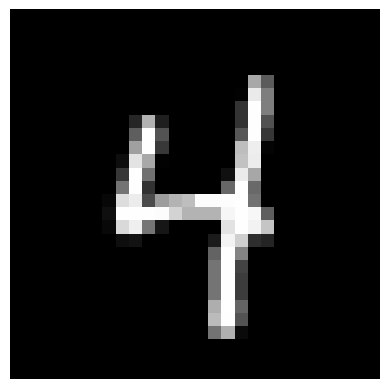

Actual Label: 4, Predicted Label: 4



In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Predict labels for some test images
predictions = model.predict(test_images)

# Display a few images with actual and predicted labels
num_images_to_display = 20

for i in range(num_images_to_display):
    # Print actual and predicted labels
    actual_label = np.argmax(test_labels[i])
    predicted_label = np.argmax(predictions[i])
    if actual_label==predicted_label:
        # Display the image
        plt.imshow(test_images[i], cmap='gray')
        plt.axis('off')
        plt.show()
        print(f"Actual Label: {actual_label}, Predicted Label: {predicted_label}\n")


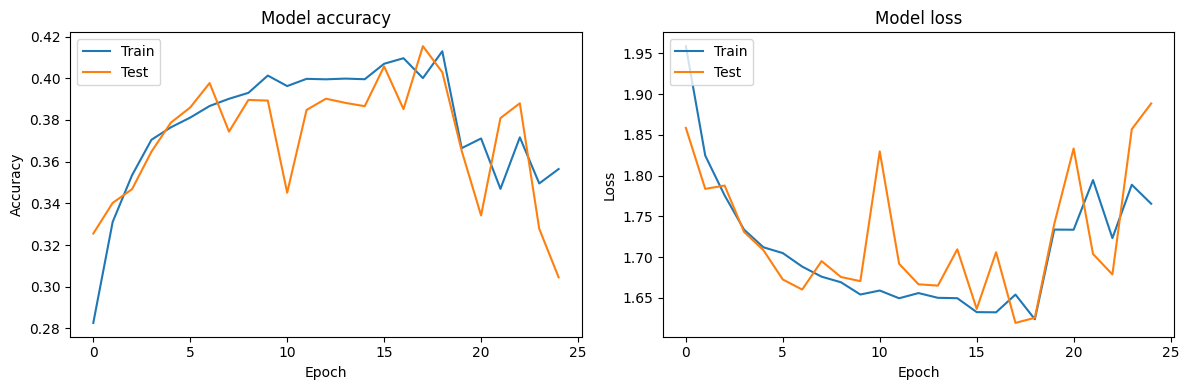

In [23]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()